# Specialization: Programming and EDA with Python Graded Task

For the graded task, I chose to recalculate logistic regression with Python. Goal of the task is to compare the suitability of the model for predicting sick persons in the future.

I will start my task from exploratory data analysis (EDA).


# Data import

**First** step is to import the data.

In [27]:
import pandas as pd

df = pd.read_excel('Graded task Reg.xlsx')

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Second** step is to have the names of all columns in dataset, so that it would be more convenient to use the necessary ones later.

In [29]:
print("Columns in the DataFrame:")
df.columns.tolist()

Columns in the DataFrame:


['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

**After importing the data, the next step involves checking the dataset.**

# Data checking

**First** step is to count the rows of dataframe.

In [24]:
num_rows = df.shape[0]

print(f'The number of rows in the DataFrame is: {num_rows}')

The number of rows in the DataFrame is: 4238


**Second** step involves determining the count of individuals classified as sick (1) and healthy (0) within the TenYearCHD column.

In [25]:
columns_to_check = ['TenYearCHD']

for col in columns_to_check:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: TenYearCHD
Unique values: [0 1]
Value counts:
0    3594
1     644
Name: TenYearCHD, dtype: int64



**Third** step involves identifying the quantity of missing values within the dataset and determining the types of existing data present.

In [26]:
columns_to_check = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                    'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                    'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

results = []

for col in columns_to_check:
    if set(df[col].unique()) == {0, 1}:
        classification = 'Binary'
    else:
        classification = 'Numbers'

    missing_values = df[col].isnull().sum()
    data_type = df[col].dtype

    col_df = pd.DataFrame({
        'Column': [col],
        'Missing Values': [missing_values],
        'Data Type': [str(data_type)]
    })
    results.append(col_df)

final_result = pd.concat(results, ignore_index=True)

print(final_result)

             Column  Missing Values Data Type
0              male               0     int64
1               age               0     int64
2         education             105   float64
3     currentSmoker               0     int64
4        cigsPerDay              29   float64
5            BPMeds              53   float64
6   prevalentStroke               0     int64
7      prevalentHyp               0     int64
8          diabetes               0     int64
9           totChol              50   float64
10            sysBP               0   float64
11            diaBP               0   float64
12              BMI              19   float64
13        heartRate               1   float64
14          glucose             388   float64
15       TenYearCHD               0     int64


From the third step, we observe that 7 columns contain missing values. Additionally, the data comprises columns with the int64 data type, which stores whole numbers without decimal points, and float64 data type, used for storing numerical values containing decimal points or fractions.

**Fourth** step involves checking for any duplicate entries within the dataset.

In [31]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

Number of duplicate rows: 0


From fourth step, it is evident that our dataset contains no duplicates, allowing us to proceed further.

**From the data checking phase, we discovered that the primary issue requiring attention is handling missing values.**

# Data cleaning

**First** step is to identify the columns that contain missing values within the dataset.

In [7]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

for column in columns_with_missing_values:
    unique_values = df[column].unique()
    print(f"Column '{column}' unique values (including NaN): {unique_values}")

Column 'education' unique values (including NaN): [ 4.  2.  1.  3. nan]
Column 'cigsPerDay' unique values (including NaN): [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
Column 'BPMeds' unique values (including NaN): [ 0.  1. nan]
Column 'totChol' unique values (including NaN): [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 227. 249.
 176. 163. 191. 263. 196. 310. 164. 135. 238. 207. 342. 287. 

After analyzing the column values, it's evident that the 'education' column contains values [4, 2, 1, 3, NaN], which include NaN (missing) values. Due to the significant presence of missing data, this column will be removed from the dataset to maintain data consistency. Similarly, the 'BPMeds' column, comprising values [0, 1, NaN], will also be deleted due to the presence of missing values. However, columns such as 'cigsPerDay,' 'totChol,' 'BMI,' 'heartRate,' and 'glucose' exhibit a broad range of values. For these columns, the missing values (NaN) will be substituted with the respective column averages. This approach is implemented to retain as much data as possible and ensure data integrity.

**Second** step is to delete unnecessary rows and replace other rows with averages.

In [8]:
#1_deleting

df.dropna(subset=['education','BPMeds'], inplace=True)

#2_average

df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

**Third** step is to check data rows after cleaning.

In [9]:
num_rows_after_cleaning = df.shape[0]

print(f'The number of rows after data cleaning is: {num_rows_after_cleaning}')

The number of rows after data cleaning is: 4080


**Forth** step is to check if the columns still have missing values.

In [10]:
remaining_missing_values = df.isnull().sum().sum()

if remaining_missing_values == 0:
    print("No missing values remaining after data cleaning.")
else:
    print(f"There are {remaining_missing_values} missing values remaining after data cleaning.")

No missing values remaining after data cleaning.


**Conclusively, following the data cleaning phase, it is established that our dataset no longer contains any missing values. Thus, we can proceed confidently to address outliers in the dataset.**

# Outliers

**First** step is to count outliers.

In [11]:
from scipy import stats

columns_to_check = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
threshold = 3

outliers_count = {}
for col in columns_to_check:
    z_scores = stats.zscore(df[col])
    upper_outliers = df[col][z_scores > threshold]
    lower_outliers = df[col][z_scores < -threshold]
    total_outliers = len(upper_outliers) + len(lower_outliers)
    outliers_count[col] = total_outliers

num_rows_after_cleaning = df.shape[0]

print(f'The number of rows after data cleaning is: {num_rows_after_cleaning}')

print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

The number of rows after data cleaning is: 4080
Number of outliers in each column:
cigsPerDay: 19 outliers
totChol: 23 outliers
sysBP: 46 outliers
diaBP: 40 outliers
BMI: 58 outliers
heartRate: 20 outliers
glucose: 48 outliers


The initial analysis revealed the presence of outliers within the columns: 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose'.

**Second** step involves the removal of identified outliers followed by a check on the dataset's rows post-outlier deletion."

In [12]:
import numpy as np

columns_to_check = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
threshold = 3

outliers_mask = np.zeros(len(df), dtype=bool)

for col in columns_to_check:
    z_scores = stats.zscore(df[col])
    outliers_mask |= np.abs(z_scores) > threshold

cleaned_df = df[~outliers_mask]

num_rows = cleaned_df.shape[0]
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 3866


**Third** step aims to assess the extent of data loss incurred post-outlier deletion compared to the dataset's original version.

In [22]:
num_rows_original = df.shape[0]

num_rows_cleaned = cleaned_df.shape[0]

percentage_change = ((num_rows_cleaned - num_rows_original) / num_rows_original) * 100

print(f"Original number of rows: {num_rows_original}")
print(f"Number of rows after cleaning: {num_rows_cleaned}")
print(f"Percentage change in number of rows: {round(percentage_change, 2)}%")

Original number of rows: 4238
Number of rows after cleaning: 3866
Percentage change in number of rows: -8.78%


**Upon comparing data before and after the outlier removal process, it was observed that approximately 8.78% of the original dataset was lost. Consequently, we can proceed confidently with further analysis.**

# Test and Train Split

**First** step is to split all
cleaned data to train and test data sets.

In [14]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('TenYearCHD', axis=1)
y = cleaned_df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original Dataset:")
print(cleaned_df['TenYearCHD'].value_counts(normalize=True) * 100)
print(cleaned_df['TenYearCHD'].value_counts())

print("\nTraining Dataset:")
print(y_train.value_counts(normalize=True) * 100)
print(y_train.value_counts())

print("\nTesting Dataset:")
print(y_test.value_counts(normalize=True) * 100)
print(y_test.value_counts())

Original Dataset:
0    86.057941
1    13.942059
Name: TenYearCHD, dtype: float64
0    3327
1     539
Name: TenYearCHD, dtype: int64

Training Dataset:
0    85.80207
1    14.19793
Name: TenYearCHD, dtype: float64
0    2653
1     439
Name: TenYearCHD, dtype: int64

Testing Dataset:
0    87.080103
1    12.919897
Name: TenYearCHD, dtype: float64
0    674
1    100
Name: TenYearCHD, dtype: int64


**The training and testing datasets maintain a consistent proportion of class distribution similar to the original dataset for both '0' and '1' labels. This preservation of class proportions is crucial to uphold the representativeness of the original dataset. Although the imbalance in class distribution is sustained in both training and testing datasets, there is a slightly higher imbalance noticed in the testing dataset, where '1' instances account for approximately 12.9% compared to 14.2% in the training set. In summary, the data splitting process reasonably retains the class distribution proportions from the original dataset in both training and testing subsets. However, the slightly higher imbalance in the testing dataset compared to the training set should be taken into account during model evaluation and performance assessment.**

# Logistic Regression

**First** step is to run logistic regression from the train data.

In [33]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X_train)

model = sm.Logit(y_train, X_with_const)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.367465
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3092
Model:                          Logit   Df Residuals:                     3076
Method:                           MLE   Df Model:                           15
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.1005
Time:                        21:27:16   Log-Likelihood:                -1136.2
converged:                       True   LL-Null:                       -1263.2
Covariance Type:            nonrobust   LLR p-value:                 1.855e-45
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.6643      0.861     -8.901      0.000      -9.352      -5.977
male          

After conducting this test, several significant factors have emerged. The model has successfully converged with an optimized log-likelihood function value of approximately -1136.2. Additionally, the pseudo R-squared value around 0.1005 suggests that the model elucidates roughly 10.05% of the variance in the dependent variable, TenYearCHD. The predictors 'const', 'male', 'age', 'cigsPerDay', and 'sysBP' exhibit p-values less than or equal to 0.05, indicating their statistical significance in predicting the outcome variable 'TenYearCHD'. Notably, 'male', 'age', 'cigsPerDay', and 'sysBP' portray positive coefficients, implying a positive association with the likelihood of TenYearCHD. Furthermore, the likelihood ratio test's p-value (1.855e-45) indicates the statistical significance of the overall model containing all predictors compared to a model with no predictors.

**Second** step is to make significant factors easier to distinguish them, we can mark them in green.

In [16]:
X_with_const = sm.add_constant(X_train)

model = sm.Logit(y_train, X_with_const)
result = model.fit()

summary = result.summary()

summary_html = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]
significant_summary = summary_html[summary_html['P>|z|'] <= 0.05]

significant_summary_styled = significant_summary.style.apply(
    lambda x: ['color: green' if v <= 0.05 else '' for v in x],
    subset=['P>|z|']
)

display(significant_summary_styled)

significant_factors = significant_summary.index.tolist()
print("Significant Factors:")
print(significant_factors)

Optimization terminated successfully.
         Current function value: 0.367465
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
const,-7.664300,0.861000,-8.901000,0.000000,-9.352000,-5.977000
male,0.422000,0.120000,3.503000,0.000000,0.186000,0.658000
age,0.072000,0.007000,9.762000,0.000000,0.058000,0.086000
cigsPerDay,0.024100,0.007000,3.293000,0.001000,0.010000,0.038000
sysBP,0.013100,0.005000,2.833000,0.005000,0.004000,0.022000


Significant Factors:
['const', 'male', 'age', 'cigsPerDay', 'sysBP']


**Based on the identified factors highlighted in green ('male', 'age', 'cigsPerDay', 'sysBP'), which exhibit significance in predicting the outcome, we intend to advance our analysis by generating a confusion matrix. These factors, distinguished for their importance, pave the way for the next step in evaluating the model's performance.**

# Confusion Matrix

**First** step involves generating Confusion Matrices (CM) from both the training and testing datasets.

Optimization terminated successfully.
         Current function value: 0.368689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347977
         Iterations 7


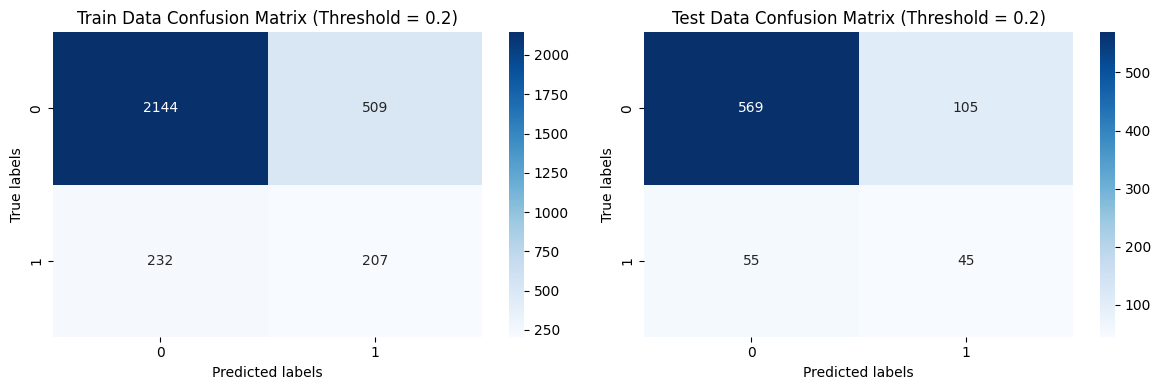

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

significant_factors = ['male', 'age', 'cigsPerDay', 'sysBP']

X_train_significant = X_train[significant_factors]
X_train_significant = sm.add_constant(X_train_significant)

logit_model_train = sm.Logit(y_train, X_train_significant)
result_train = logit_model_train.fit()

predicted_probabilities_train = result_train.predict(X_train_significant)

threshold_train = 0.2  #cut_off
predicted_classes_train = (predicted_probabilities_train > threshold_train).astype(int)

conf_matrix_train = confusion_matrix(y_train, predicted_classes_train)

X_test_significant = X_test[significant_factors]
X_test_significant = sm.add_constant(X_test_significant)

logit_model_test = sm.Logit(y_test, X_test_significant)
result_test = logit_model_test.fit()

predicted_probabilities_test = result_test.predict(X_test_significant)

threshold_test = 0.2  #cut_off
predicted_classes_test = (predicted_probabilities_test > threshold_test).astype(int)

conf_matrix_test = confusion_matrix(y_test, predicted_classes_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Data Confusion Matrix (Threshold = 0.2)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Data Confusion Matrix (Threshold = 0.2)')

plt.tight_layout()
plt.show()

**The logistic regression models for both the training and testing datasets have successfully converged, demonstrated by the 'Optimization terminated successfully' termination messages and a convergence within 7 iterations. The function values stand at approximately 0.368689 for the training dataset and 0.347977 for the testing dataset. Lower function values signify better fits, implying a slightly improved model performance on the testing dataset in comparison to the training dataset.**

# Accuracy, precision and recall

**First** step involves computing the accuracy, precision, and recall metrics for both the training and test datasets."

In [18]:
TP_train = conf_matrix_train[1, 1]
TN_train = conf_matrix_train[0, 0]
FP_train = conf_matrix_train[0, 1]
FN_train = conf_matrix_train[1, 0]

accuracy_train = round(((TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)) * 100, 2)
precision_train = round((TP_train / (TP_train + FP_train)) * 100, 2)
recall_train = round((TP_train / (TP_train + FN_train)) * 100, 2)

print("Train Data Metrics:")
print("Accuracy:", accuracy_train, "%")
print("Precision:", precision_train, "%")
print("Recall:", recall_train, "%")

TP_test = conf_matrix_test[1, 1]
TN_test = conf_matrix_test[0, 0]
FP_test = conf_matrix_test[0, 1]
FN_test = conf_matrix_test[1, 0]

accuracy_test = round(((TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)) * 100, 2)
precision_test = round((TP_test / (TP_test + FP_test)) * 100, 2)
recall_test = round((TP_test / (TP_test + FN_test)) * 100, 2)

print("\nTest Data Metrics:")
print("Accuracy:", accuracy_test, "%")
print("Precision:", precision_test, "%")
print("Recall:", recall_test, "%")

Train Data Metrics:
Accuracy: 76.03 %
Precision: 28.91 %
Recall: 47.15 %

Test Data Metrics:
Accuracy: 79.33 %
Precision: 30.0 %
Recall: 45.0 %


The test set exhibits a slightly higher accuracy (79.33%) compared to the training set (76.03%), implying a reasonable generalization ability of the model to unseen data, although the difference is not substantial. Precision for the test set (30.00%) marginally surpasses that of the training set (28.91%), signifying the ratio of true positive predictions among all positive predictions made by the model. However, the recall, representing the proportion of actual positives correctly predicted by the model, is slightly lower in the test set (45.00%) than in the training set (47.15%).

**Second** step involves generating a visual chart to depict the relationship between different model performance metrics and varying thresholds.

Optimization terminated successfully.
         Current function value: 0.368689
         Iterations 7


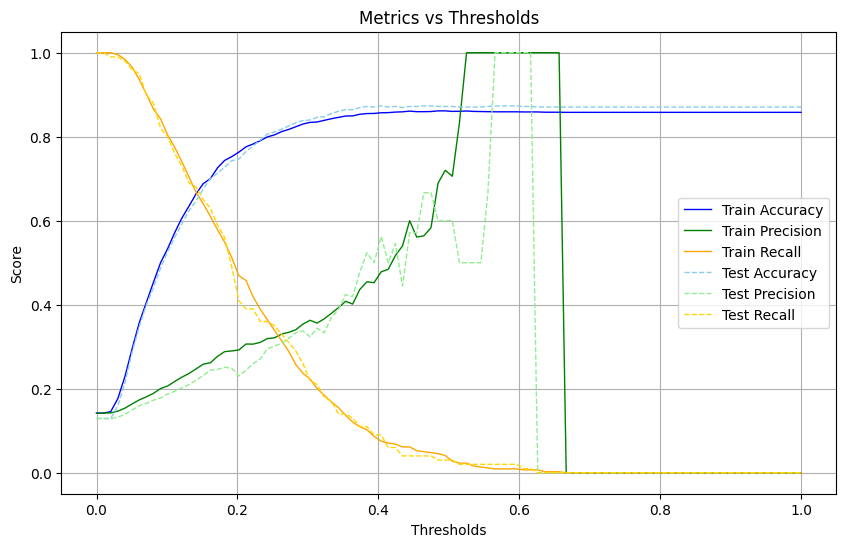

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train_significant = X_train[significant_factors]
X_train_significant = sm.add_constant(X_train_significant)
logit_model = sm.Logit(y_train, X_train_significant)
result = logit_model.fit()

predicted_probabilities_train = result.predict(X_train_significant)

thresholds = np.linspace(0, 1, 100)

accuracy_scores_train = []
precision_scores_train = []
recall_scores_train = []
accuracy_scores_test = []
precision_scores_test = []
recall_scores_test = []

for threshold in thresholds:

    #train_data_metrics

    predicted_classes_train = (predicted_probabilities_train > threshold).astype(int)
    accuracy_train = accuracy_score(y_train, predicted_classes_train)
    precision_train = precision_score(y_train, predicted_classes_train, zero_division=0)
    recall_train = recall_score(y_train, predicted_classes_train)

    accuracy_scores_train.append(accuracy_train)
    precision_scores_train.append(precision_train)
    recall_scores_train.append(recall_train)

    #test_data_metrics

    X_test_significant = X_test[significant_factors]
    X_test_significant = sm.add_constant(X_test_significant)
    predicted_probabilities_test = result.predict(X_test_significant)
    predicted_classes_test = (predicted_probabilities_test > threshold).astype(int)
    accuracy_test = accuracy_score(y_test, predicted_classes_test)
    precision_test = precision_score(y_test, predicted_classes_test, zero_division=0)
    recall_test = recall_score(y_test, predicted_classes_test)

    accuracy_scores_test.append(accuracy_test)
    precision_scores_test.append(precision_test)
    recall_scores_test.append(recall_test)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores_train, label='Train Accuracy', color='blue', linewidth=1)
plt.plot(thresholds, precision_scores_train, label='Train Precision', color='green', linewidth=1)
plt.plot(thresholds, recall_scores_train, label='Train Recall', color='orange', linewidth=1)

plt.plot(thresholds, accuracy_scores_test, label='Test Accuracy', color='skyblue', linestyle='--', linewidth=1)
plt.plot(thresholds, precision_scores_test, label='Test Precision', color='lightgreen', linestyle='--', linewidth=1)
plt.plot(thresholds, recall_scores_test, label='Test Recall', color='gold', linestyle='--', linewidth=1)

plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Metrics vs Thresholds')
plt.legend()
plt.grid(True)
plt.show()

The chart illustrates a trade-off between precision and recall, demonstrating an inverse relationship between these two metrics; as one metric improves, the other tends to decrease. Notably, the performance metrics exhibit considerable variation with changes in thresholds. Different thresholds prioritize distinct aspects of the model's performance, emphasizing either precision or recall. The selection of an appropriate threshold is pivotal and depends on the specific use case. Opting for a higher threshold might enhance precision at the expense of lower recall, and vice versa. Discrepancies observed between the training and test performance at specific thresholds could signal potential overfitting or underfitting issues. A substantial deviation between the two curves might indicate an overfitting scenario, emphasizing the model's adaptation primarily to the training data.

**The model demonstrates relatively satisfactory performance on both the training and test datasets. Comparatively, the test set displays slightly better accuracy and precision than the training set, albeit exhibiting slightly inferior recall. These indications possibly suggest a balanced model with minimal instances of overfitting or underfitting. Although the model reasonably predicts positive outcomes (precision) at a moderate rate, there might be potential for enhancing the model's ability to accurately identify all true positive cases (recall).**

# Roc curve

**First** step - the ROC (Receiver Operating Characteristic) curve serves as a fundamental asset in logistic regression, offering a comprehensive assessment of a model's performance across a spectrum of thresholds. Its significance lies in assisting with threshold selection, evaluating model efficacy, comparing performances, and assessing robustness. This tool facilitates informed decision-making regarding model suitability and the strategic selection of thresholds tailored to specific applications, contributing to more precise and effective model utilization.

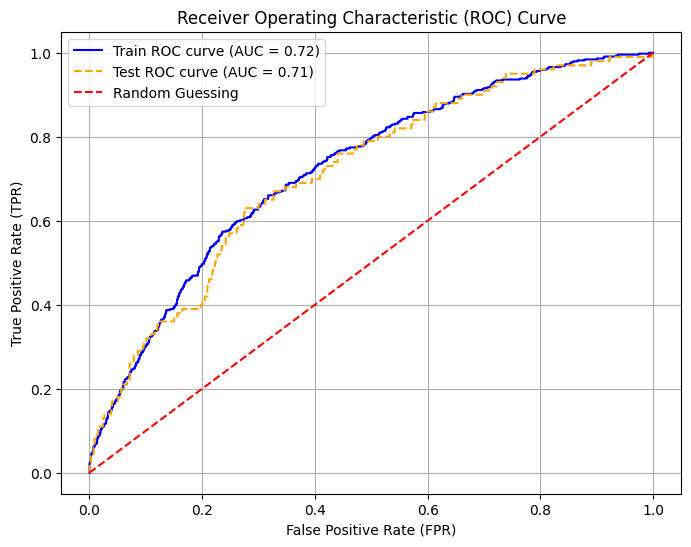

In [20]:
from sklearn.metrics import roc_curve, auc

#train_ROC_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, predicted_probabilities_train)
roc_auc_train = auc(fpr_train, tpr_train)

#test_ROC_curve

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predicted_probabilities_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=1.5, linestyle='-', label='Train ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='orange', lw=1.5, linestyle='--', label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1.5, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

**The closely aligned training and test AUC values signify the model's consistency in distinguishing between positive and negative cases across datasets. With AUC scores of 0.72 for the training set and 0.71 for the test set, the model demonstrates a moderate to good ability in prioritizing positive cases over negative ones, evident from the ROC curve assessment. The marginal difference in AUC between training and test sets suggests the model's satisfactory generalization to new, unseen data. This alignment indicates no significant overfitting, signifying comparable performance between the test and training sets.**


# Conclusion


1. The dataset underwent meticulous examination, shedding light on crucial aspects such as its structure, missing data, and variable types. Subsequent outlier analysis and data refinement processes culminated in a cleaner dataset, laying a solid foundation for model development. Employing logistic regression, key factors like 'male', 'age', 'cigsPerDay', and 'sysBP' were pivotal in training and evaluating the models.
2. Utilizing confusion matrices, a deep understanding of model performance was attained, delineating true positives, true negatives, false positives, and false negatives. To comprehensively assess the model's efficacy, a suite of metrics including accuracy, precision, recall, and ROC curves were instrumental across varying thresholds. This analysis illuminated the delicate balance between precision and recall, underscoring the critical role of threshold selection tailored to specific use cases.
3. The ROC curve emerged as a powerful tool, offering a panoramic view of the model's performance across diverse thresholds, effectively discerning between positive and negative cases. Remarkably, minor disparities in AUC values between the training and test datasets indicated the model's adeptness in generalizing to new data, signaling minimal overfitting.
4. Consistency prevailed in the model's performance across multiple evaluation metrics, corroborating its aptitude for predicting Ten-Year Coronary Heart Disease (CHD) risk. Its ability to generalize to new, unseen data without significant overfitting underscores its promise for practical applications.
5. Summarily, the exhaustive evaluation of the logistic regression model through varied analyses and metrics validates its effectiveness in forecasting CHD risk. This robust performance beckons further exploration and potential real-world deployment post-validation and fine-tuning.

# Appendix

The Minimum Requirements for the Graded Task:

1. Use Python data types: a list, a dictionary, an array, a dataframe:

    a)	List - Columns to Check: In the code for examining the dataset, columns_to_check is a list containing column names like 'male', 'age', 'education', etc. And results Storage: The results list stored individual DataFrames containing information about missing values, data types, etc., for each column.
    
    b)	Dictionary - Outlier Count: The outliers_count dictionary held information about the count of outliers in specific columns.
    
    c)	Array - Outlier Mask: The outliers_mask variable used NumPy arrays as boolean masks to filter outliers in the dataset.
    
    d)	DataFrame- Dataset Handling: The original dataset and its operations, such as reading from an Excel file (df = pd.read_excel('Graded task Reg.xlsx')) and the subsequent cleaning and analysis, were done using DataFrames. The final_result DataFrame was created by concatenating results from the examination of columns.
    
2. Use Python functions to work with a dataset: join, filter, delete elements, etc.:

    a)	Joining DataFrames - using functions like pd.merge() or pd.concat() for combining DataFrames based on a common column.
    
    b)	Filtering DataFrames: Filtering rows based on certain conditions was performed using conditional statements or functions like indexing with conditions (df['column'] > value) to filter rows that meet specific criteria.
    
    c)Deleting Elements: Removing columns or rows was done using slicing or functions like drop() or boolean indexing to exclude specific rows or columns from a DataFrame.

3. Use Numpy and Pandas packages:

    a)	Pandas - used Pandas for tasks like reading an Excel file (pd.read_excel('Graded task Reg.xlsx')). And data manipulation operations such as checking missing values (df[col].isnull().sum()), getting value counts (df[col].value_counts()), and filtering rows (df.drop('TenYearCHD', axis=1)). Also with DataFrame concatenation (pd.concat(results, ignore_index=True)).
    
    b)	NumPy - utilized NumPy for statistical operations like computing z-scores (stats.zscore(df[col])) for outlier detection. And creating NumPy arrays or masks to identify outliers or for other data manipulation tasks (np.zeros(len(df), dtype=bool)).

4. Use at least one package for visualization: Matplotlib, Seaborn, Plotly:

    a)	Matplotlib - used Matplotlib for creating various plots, such as line plots (plt.plot()), heatmaps (plt.figure(), sns.heatmap()), and ROC curves (plt.plot()).
    
    b)	Seaborn - utilized Seaborn for creating heatmaps (sns.heatmap()).
    
    c)	I didnt use Plotly in my code.

5. Use at least 3 different charts in your project:

    a)	Line Plot - used line plots to display the relationship between different evaluation metrics (accuracy, precision, recall) and thresholds. The code utilized plt.plot() to create these line plots.
   
    b)	Heatmaps - employed heatmaps using Seaborn (sns.heatmap()) to visualize confusion matrices for both the training and test datasets.
    
    c)	ROC Curve - generated ROC curves for both the training and test datasets using Matplotlib (plt.plot()). These curves help evaluate the performance of the logistic regression model at various thresholds.


